# Introdução


Para realizar esta atividade, carregue o dataset IEEE-CIS Fraud Detection. Em seguida, faça uma análise exploratória dos dados para entender as características das transações, como distribuições, correlações e possíveis outliers. Use gráficos e estatísticas descritivas para apoiar sua análise.

Depois, prepare os dados para o treinamento da rede neural LSTM. Isso pode incluir o tratamento de valores ausentes, normalização e a criação de sequências temporais, conforme necessário para o modelo LSTM. Em seguida, defina a arquitetura da rede LSTM, escolhendo o número de camadas, neurônios, e outros hiperparâmetros relevantes.

Treine o modelo utilizando um conjunto de treinamento e valide-o utilizando um conjunto de teste. Aplique métricas como precisão, recall, F1-score e AUC-ROC para avaliar o desempenho do modelo. Durante o treinamento, observe a curva de aprendizado para identificar sinais de overfitting ou underfitting.

Após treinar o modelo, analise os resultados. Compare o desempenho nas diferentes fases do treinamento e identifique qualquer possível overfitting ou outros problemas de ajuste. Discuta as estratégias que você utilizou para melhorar a performance do modelo e os insights que obteve durante o processo.

Por fim, documente todas as etapas realizadas, incluindo a preparação dos dados, a definição da arquitetura do modelo, o treinamento, a validação, e a análise dos resultados.






# 1) Setup

A configuração de setup é o processo de preparar e organizar o ambiente para uso. Envolvendo a instalação de bibliotecas e configuração de outros ajustes necessários. O objetivo é criar um ambiente funcional para executar tarefas específicas.

## 1.1) Instalação das Bibliotecas


In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.impute import SimpleImputer

In [3]:
from sklearn.utils import resample

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

## 1.2) Leitura dos Dados

In [5]:
BASE_FRAUDE = pd.read_csv('/content/train_transaction.csv')

In [6]:
BASE_FRAUDE

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2) Exploração da Base

## 2.1) Descrição das Features

In [ ]:
BASE_FRAUDE.dtypes

,0
TransactionID,int64
isFraud,int64
TransactionDT,int64
TransactionAmt,float64
ProductCD,object
...,...
V335,float64
V336,float64
V337,float64
V338,float64


*   **TransactionID**: Identificador único da transação.

*   **isFraud**: A coluna alvo que indica se a transação é fraudulenta (1) ou não (0).

*   **TransactionDT**: Um valor sequencial de tempo, que permite  calcular a ordem das transações ou o tempo decorrido entre elas.

*   **TransactionAmt**: O valor da transação.

*   **ProductCD**: Código do produto associado à transação.

* **Variáveis do Cartão de Crédito (card1 a card6)**: Vários atributos do cartão de crédito/débito utilizado na transação, como tipo do cartão, banco emissor, entre outras.

* **Outras Variáveis (V330 a V339)**: São variáveis anônimas que foram ofuscadas para proteger a privacidade dos dados. São valores numéricos que podem representar comportamentos, padrões, ou outras informações que a plataforma de pagamento ou o banco associam à transação.

## 2.2) Estatísticas Descritivas

In [ ]:
BASE_FRAUDE.shape

(590540, 394)

A base possui 590540 amostras e 394 features.

In [ ]:
BASE_FRAUDE.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,55.000000,160000.000000,160000.000000,160000.000000,55125.000000,55125.00000,55125.000000,104060.000000,104060.000000,104060.000000


Algumas conclusões que podem ser extraídas da tabela acima:
*   O valor médio de transações está em torno de 135, com um desvio padrão relativamente alto (239), indicando que há uma ampla variação nos valores das transações. O valor máximo chega a mais de 31.000 unidades, sugerindo a presença de transações incomuns, que podem ser outliers.

*   As variáveis relacionadas ao cartão de crédito (e.g., card1, card2, card3) têm grandes variações, mas sem valores atípicos claros.


## 2.3) Verificar os Valores Ausentes

In [ ]:
VALORES_AUSENTES = BASE_FRAUDE.isnull().sum().sort_values(ascending=False)
PORCENTAGEM_VALORES_AUSENTES = (VALORES_AUSENTES / len(BASE_FRAUDE)) * 100

DF_AUSENTES = pd.DataFrame({'Total': VALORES_AUSENTES, 'Porcentagem': PORCENTAGEM_VALORES_AUSENTES})
DF_AUSENTES.head(10)

,Total,Porcentagem
dist2,552913,93.628374
D7,551623,93.409930
D13,528588,89.509263
D14,528353,89.469469
D12,525823,89.041047
D6,517353,87.606767
D9,515614,87.312290
D8,515614,87.312290
V153,508595,86.123717
V139,508595,86.123717


A tabela acima demonstra que várias colunas possuem muitos dados faltantes, com algumas atingindo mais de 90% de ausência, como dist2 e várias variáveis relacionadas a transações temporais.

## 2.4) Distribuição de Transações Fraudulentas

In [ ]:
TOTAL_FRAUDES = BASE_FRAUDE['isFraud'].value_counts()

In [ ]:
TOTAL_FRAUDES

,count
isFraud,
0,569877
1,20663


In [ ]:
GRAFICO_FRAUDES = px.pie(values=TOTAL_FRAUDES.values, names=TOTAL_FRAUDES.index, title="Distribuição de Transações Fraudulentas vs Não Fraudulentas")
GRAFICO_FRAUDES.show()

Apenas cerca de 3,5% das transações são fraudulentas, enquanto o restante (96,5%) são legítimas. Isso demonstra que há um grande  desbalanceamento do dataset.

## 2.5) Análise de Correlações

In [ ]:
COLUNAS_NUMERICAS = BASE_FRAUDE.select_dtypes(include=['float64', 'int64']).columns

In [ ]:
MATRIZ_CORRELACAO = BASE_FRAUDE[COLUNAS_NUMERICAS].corr()

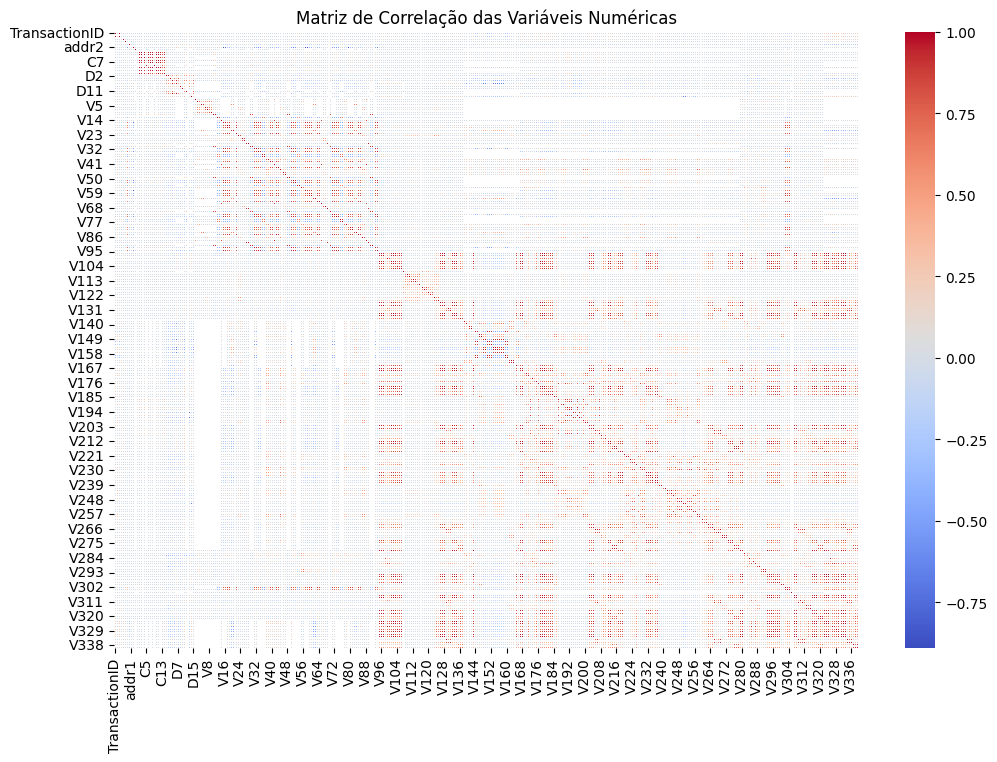

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(MATRIZ_CORRELACAO, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

Algumas conclusões que podem ser extraídas da matriz de correlação:

*  A matriz parece bastante "esparsa", indicando que muitas variáveis não possuem correlações fortes entre si.

*  As poucas correlações mais significativas aparecem em algumas das variáveis V, que são variáveis anônimas. Isso sugere que essas variáveis podem carregar algumas informações importantes relacionadas ao comportamento das transações.

# 3) Tratamento da Base

## 3.1) Balanceamento dos Dados

 Inicialmente as classes majoritária e minoritária são separadas e, em seguida, uma subamostragem da classe majoritária é selecionada para combinar com o número de amostras da classe minoritária.



In [7]:
CLASSE_MAJORITARIA = BASE_FRAUDE[BASE_FRAUDE.isFraud == 0]
CLASSE_MINORITARIA = BASE_FRAUDE[BASE_FRAUDE.isFraud == 1]

In [8]:
SUBAMOSTRAGEM = resample(CLASSE_MAJORITARIA, replace=False, n_samples=len(CLASSE_MINORITARIA), random_state=42)

In [9]:
DF_TRATADO = pd.concat([CLASSE_MINORITARIA, SUBAMOSTRAGEM])

In [10]:
DF_TRATADO

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
203,2987203,1,89760,445.000,W,18268,583.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,2987240,1,90193,37.098,C,13413,103.0,185.0,visa,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,2987243,1,90246,37.098,C,13413,103.0,185.0,visa,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,2987245,1,90295,37.098,C,13413,103.0,185.0,visa,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288,2987288,1,90986,155.521,C,16578,545.0,185.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277283,3264283,0,6737112,31.500,W,15066,170.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254760,3241760,0,6104029,150.000,R,4820,555.0,144.0,american express,137.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64884,3051884,0,1461671,226.000,W,15066,170.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
532081,3519081,0,14003658,13.710,C,15257,375.0,185.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3.2) Tratamento de Valores Ausentes

 Os valores ausentes estão sendo preenchidos com a mediana de cada coluna numérica.

In [11]:
COLUNAS_AUSENTES = DF_TRATADO.select_dtypes(include=['float64', 'int64']).columns

In [12]:
IMPUTACAO = SimpleImputer(strategy='median')
DF_TRATADO[COLUNAS_AUSENTES] = IMPUTACAO.fit_transform(DF_TRATADO[COLUNAS_AUSENTES])

In [13]:
DF_TRATADO

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
203,2987203.0,1.0,89760.0,445.000,W,18268.0,583.0,150.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
240,2987240.0,1.0,90193.0,37.098,C,13413.0,103.0,185.0,visa,137.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243,2987243.0,1.0,90246.0,37.098,C,13413.0,103.0,185.0,visa,137.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
245,2987245.0,1.0,90295.0,37.098,C,13413.0,103.0,185.0,visa,137.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
288,2987288.0,1.0,90986.0,155.521,C,16578.0,545.0,185.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277283,3264283.0,0.0,6737112.0,31.500,W,15066.0,170.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254760,3241760.0,0.0,6104029.0,150.000,R,4820.0,555.0,144.0,american express,137.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64884,3051884.0,0.0,1461671.0,226.000,W,15066.0,170.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
532081,3519081.0,0.0,14003658.0,13.710,C,15257.0,375.0,185.0,mastercard,224.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3.3) Aplicar One-Hot Encoding


In [14]:
COLUNAS_CATEGORICAS = ['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain']  # Liste suas variáveis categóricas

In [15]:
DF_TRATADO = pd.get_dummies(DF_TRATADO, columns=COLUNAS_CATEGORICAS, drop_first=True)

In [16]:
DF_TRATADO

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,R_emaildomain_web.de,R_emaildomain_windstream.net,R_emaildomain_yahoo.co.jp,R_emaildomain_yahoo.co.uk,R_emaildomain_yahoo.com,R_emaildomain_yahoo.com.mx,R_emaildomain_yahoo.de,R_emaildomain_yahoo.es,R_emaildomain_yahoo.fr,R_emaildomain_ymail.com
203,2987203.0,1.0,89760.0,445.000,18268.0,583.0,150.0,226.0,251.0,87.0,...,False,False,False,False,False,False,False,False,False,False
240,2987240.0,1.0,90193.0,37.098,13413.0,103.0,185.0,137.0,299.0,87.0,...,False,False,False,False,False,False,False,False,False,False
243,2987243.0,1.0,90246.0,37.098,13413.0,103.0,185.0,137.0,299.0,87.0,...,False,False,False,False,False,False,False,False,False,False
245,2987245.0,1.0,90295.0,37.098,13413.0,103.0,185.0,137.0,299.0,87.0,...,False,False,False,False,False,False,False,False,False,False
288,2987288.0,1.0,90986.0,155.521,16578.0,545.0,185.0,226.0,299.0,87.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277283,3264283.0,0.0,6737112.0,31.500,15066.0,170.0,150.0,102.0,299.0,87.0,...,False,False,False,False,False,False,False,False,False,False
254760,3241760.0,0.0,6104029.0,150.000,4820.0,555.0,144.0,137.0,536.0,96.0,...,False,False,False,False,False,False,False,False,False,False
64884,3051884.0,0.0,1461671.0,226.000,15066.0,170.0,150.0,102.0,327.0,87.0,...,False,False,False,False,False,False,False,False,False,False
532081,3519081.0,0.0,14003658.0,13.710,15257.0,375.0,185.0,224.0,299.0,87.0,...,False,False,False,False,False,False,False,False,False,False


## 3.4) Normalização dos Dados

Abaixo é realizado a normalização dos dados.

In [17]:
X = DF_TRATADO.drop('isFraud', axis=1)
y = DF_TRATADO['isFraud']

In [20]:
scaler = MinMaxScaler()
X_ESCALA = scaler.fit_transform(X)

ValueError: could not convert string to float: 'T'

In [ ]:
DF_TRATADO_V2 = pd.DataFrame(X_ESCALA, columns=X.columns)

## 3.5) Criação de Sequências Temporais para LSTM

In [21]:
def CRIAR_SEQUENCIAS(X, y, time_steps=30):
    Xs, ys = [], []

    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)].values)
        ys.append(y[i + time_steps])

    return np.array(Xs), np.array(ys)

In [22]:
time_steps = 30
X_lstm, y_lstm = CRIAR_SEQUENCIAS(X_ESCALA, y, time_steps)

NameError: name 'X_ESCALA' is not defined

# 4) Modelagem

## 4.2) Criação do Modelo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42, stratify=y_lstm)

In [ ]:
model = Sequential()

In [ ]:
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))

In [ ]:
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.2))

In [ ]:
model.add(Dense(32, activation='relu'))

In [ ]:
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=1)

## 4.3) Avaliação do Modelo

In [ ]:
y_pred_prob = model.predict(X_test)

In [ ]:
y_pred = (y_pred_prob > 0.5).astype(int)

In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

In [ ]:
print(f'Precisão: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'AUC-ROC: {roc_auc:.4f}')

In [ ]:
plt.figure(figsize=(12, 6))

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda (Loss) durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
plt.show()